I found a dataset of hourly energy consumption from my local provider on Kaggle. I wanted to know:

1. Is energy consumption increasing, decreasing or static over time?
2. Are there any interesting events that create spikes or drops in consumption?

In [1]:
# I imported the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# I read in the dataset
df = pd.read_csv('Hourly_Energy.csv')

I examined it, converted the Datetime field to a Datetime object,then created new features: month, year, hour and weekday.

In [3]:
df.head()

,Datetime,DOM_MW
0,12/31/2005 1:00,9389
1,12/31/2005 2:00,9070
2,12/31/2005 3:00,9001
3,12/31/2005 4:00,9042
4,12/31/2005 5:00,9132


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116189 entries, 0 to 116188
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Datetime  116189 non-null  object
 1   DOM_MW    116189 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [5]:
df['Datetime'] = pd.to_datetime(df.Datetime)

In [6]:
df['Month'] = df.Datetime.dt.month
df['Year'] = df.Datetime.dt.year
df['Hour'] = df.Datetime.dt.hour
df['Day'] = df.Datetime.dt.day
df['Weekday'] = df.Datetime.dt.weekday

In [7]:
df = df.set_index('Datetime')

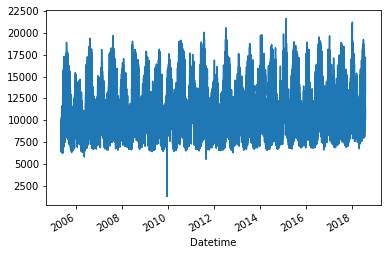

In [8]:
df.DOM_MW.plot()

In [9]:
df[df.DOM_MW == df.DOM_MW.min()]

,DOM_MW,Month,Year,Hour,Day,Weekday
Datetime,,,,,,
2009-12-12,1253,12,2009,0,12,5


There is an extreme low outlier on December 12, 2009 at midnight. Google searches did not yield any results. Was there an outage at that time? Since it does not appear to be part of a larger trend, I will ignore this point for the rest of the data exploration.

I wanted to know: How does energy consumption change per month, per year, per day of the week, or per hour of the day? 

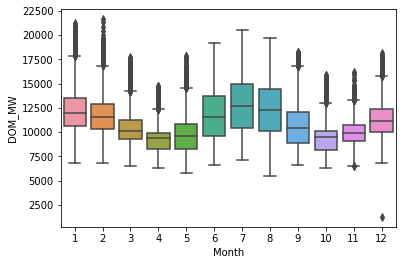

In [10]:
ax = sns.boxplot(x="Month", y="DOM_MW", data=df)

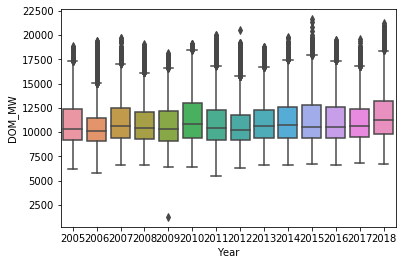

In [11]:
ax2 = sns.boxplot(x="Year", y="DOM_MW", data=df)

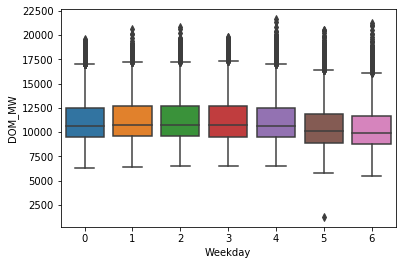

In [12]:
ax3 = sns.boxplot(x="Weekday", y="DOM_MW", data=df)

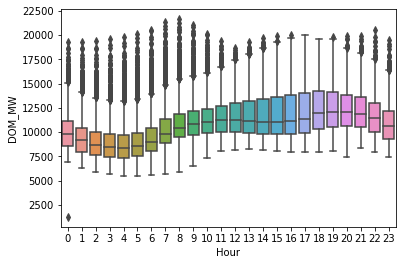

In [13]:
sns.boxplot(x="Hour", y="DOM_MW", data=df)


The boxplot of the hourly consumption shows that between midnight and midday, there are large numbers of outliers, and that the overall range is wider during this time of day. I created a pivot table and calculated the maximum and minimum values per hour of day and the difference between maximum and minimum.

In [14]:
pivotmm = pd.pivot_table(data=df,index='Hour', values='DOM_MW', aggfunc=['max','min'])

In [15]:
pivotmm

,max,min
,DOM_MW,DOM_MW
Hour,,
0,19275,1253
1,19268,6345
2,19433,5929
3,19603,5705
4,19813,5522
5,20136,5518
6,20532,5595
7,21324,5680


In [16]:
pivotmm['Max-Min'] = pivotmm.iloc[:,0] - pivotmm.iloc[:,1]

In [17]:
pivotmm

,max,min,Max-Min
,DOM_MW,DOM_MW,
Hour,,,
0,19275,1253,18022
1,19268,6345,12923
2,19433,5929,13504
3,19603,5705,13898
4,19813,5522,14291
5,20136,5518,14618
6,20532,5595,14937
7,21324,5680,15644


I plotted the difference between maximums and minimums at each hour.

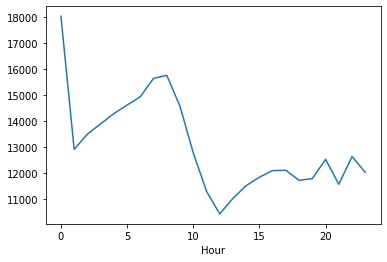

In [18]:
pivotmm['Max-Min'].plot()

What causes the range to be so wide before the 12th hour?  Is it the month of the year?
I transformed the data to look at maximum and minimum values at the following hours: 1m 9, 12 and 19 for each month of the year.
I plotted the maximum and minimum for each hour.

In [19]:
pivty1 = pd.pivot_table(data = df[df['Hour']==1], index='Month', values='DOM_MW', aggfunc=['max','min'],columns='Hour')
pivty9 = pd.pivot_table(data = df[df['Hour']==9], index='Month', values='DOM_MW', aggfunc=['max','min'],columns='Hour')
pivty12 = pd.pivot_table(data = df[df['Hour']==12], index='Month', values='DOM_MW', aggfunc=['max','min'],columns='Hour')
pivty19 = pd.pivot_table(data = df[df['Hour']==19], index='Month', values='DOM_MW', aggfunc=['max','min'],columns='Hour')

pm = pd.concat([pivty1, pivty9, pivty12, pivty19], axis=1)
pm

,max,min,max,min,max,min,max,min
Hour,1,1,9,9,12,12,19,19
Month,,,,,,,,
1,19268,7324,21037,8456,18309,8926,19816,10029
2,18639,7441,20860,8677,18635,8691,19398,9750
3,15204,7059,17255,7652,15516,8590,16973,8515
4,10863,6782,12715,7597,12442,8283,14434,8014
5,10953,6772,13035,7631,16124,8312,17160,8205
6,12841,7467,14168,8011,17349,9339,19002,9270
7,14235,8017,14677,8526,18516,9874,19352,9846
8,14103,6345,14660,6469,17942,8725,19261,8760


In [20]:
pm['1dif'] = pm.iloc[:,0] - pm.iloc[:,1]
pm['9dif'] = pm.iloc[:,2] - pm.iloc[:,3]
pm['12dif'] = pm.iloc[:,4] - pm.iloc[:,5]
pm['19dif'] = pm.iloc[:,6] - pm.iloc[:,7]

In [21]:
pm

,max,min,max,min,max,min,max,min,1dif,9dif,12dif,19dif
Hour,1,1,9,9,12,12,19,19,,,,
Month,,,,,,,,,,,,
1,19268,7324,21037,8456,18309,8926,19816,10029,11944,12581,9383,9787
2,18639,7441,20860,8677,18635,8691,19398,9750,11198,12183,9944,9648
3,15204,7059,17255,7652,15516,8590,16973,8515,8145,9603,6926,8458
4,10863,6782,12715,7597,12442,8283,14434,8014,4081,5118,4159,6420
5,10953,6772,13035,7631,16124,8312,17160,8205,4181,5404,7812,8955
6,12841,7467,14168,8011,17349,9339,19002,9270,5374,6157,8010,9732
7,14235,8017,14677,8526,18516,9874,19352,9846,6218,6151,8642,9506
8,14103,6345,14660,6469,17942,8725,19261,8760,7758,8191,9217,10501


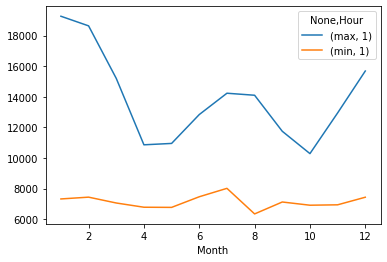

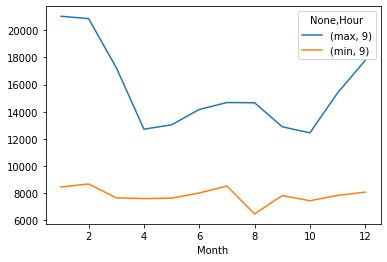

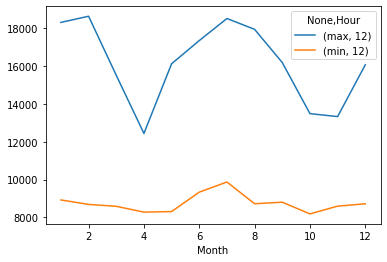

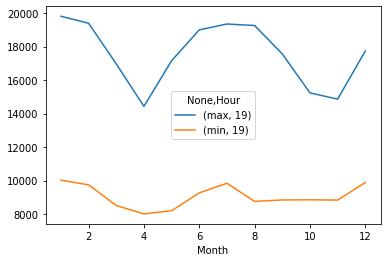

In [22]:
pm.iloc[:,0:2].plot()
pm.iloc[:,2:4].plot()
pm.iloc[:,4:6].plot()
pm.iloc[:,6:8].plot()

The minimum values do not vary nearly as wildly as the maximum.
I suspect this is due to Heating/Cooling. Over the course of the year, I hypothesize that the minimum represents times when HVAC units are not working, which can happen at any time of the day in any month.
The most intense peaks in the early morning occur during winter months. I would guess these are the extreme cold nights.
At the 12th and 19th hours, there are equally high peaks in winter and in summer.

Is any of this changing over time? I charted the Maximum, Minimum and Mean at each hour time over the entire period by indexing on years.

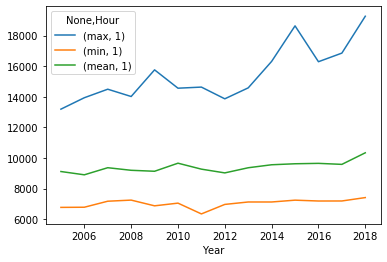

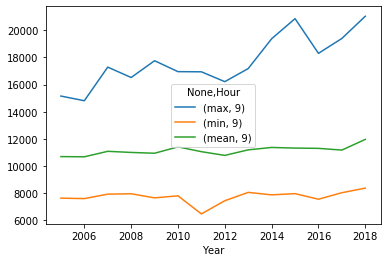

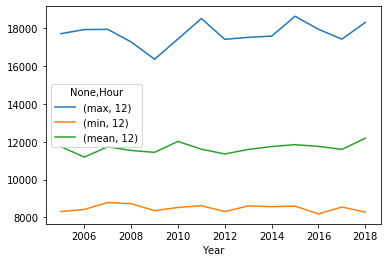

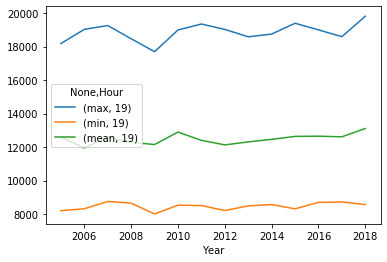

In [23]:
pivy1 = pd.pivot_table(data = df[df['Hour']==1], index='Year', values='DOM_MW', aggfunc=['max','min','mean'],columns='Hour')
pivy9 = pd.pivot_table(data = df[df['Hour']==9], index='Year', values='DOM_MW', aggfunc=['max','min','mean'],columns='Hour')
pivy12 = pd.pivot_table(data = df[df['Hour']==12], index='Year', values='DOM_MW', aggfunc=['max','min','mean'],columns='Hour')
pivy19 = pd.pivot_table(data = df[df['Hour']==19], index='Year', values='DOM_MW', aggfunc=['max','min','mean'],columns='Hour')

py = pd.concat([pivy1, pivy9, pivy12, pivy19], axis=1)
py.iloc[:,0:3].plot()
py.iloc[:,3:6].plot()
py.iloc[:,6:9].plot()
py.iloc[:,9:].plot()

It appears that the maximum values for hours 1 and 9 are increasing, whereas the maximum values for hours 12 and 19 are not. 
Maximums at those times appear to be driven by extreme winter events.
I hypothesize that peak usage is caused by extreme cold snaps that are increasing over time.